In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import ast

import re
import nltk #Natural Language Toolkit
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from joblib import dump, load

In [131]:
tmdb_5000_movies_df   = pd.read_csv('/content/tmdb_5000_movies.csv', engine='python')
tmdb_5000_credits_df  = pd.read_csv('/content/tmdb_5000_credits.csv', engine='python')

def Explore(title_, dataframe_):
    display(Markdown(title_))
    display(Markdown('---'))
    display(dataframe_.tail())
    display('Descriptive Statistics')
    display(dataframe_.describe())
    display('Missing Values')
    display(dataframe_.isnull().sum().sort_values(ascending=False))
    display('Column Data Types')
    display(dataframe_.dtypes)

Explore('### Movies Data', tmdb_5000_movies_df)
Explore('### Credits Data', tmdb_5000_credits_df)

### Movies Data

---

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


'Descriptive Statistics'

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


'Missing Values'

,0
homepage,3091
tagline,844
overview,3
runtime,2
release_date,1
id,0
budget,0
genres,0
original_title,0
popularity,0


'Column Data Types'

,0
budget,int64
genres,object
homepage,object
id,int64
keywords,object
original_language,object
original_title,object
overview,object
popularity,float64
production_companies,object


### Credits Data

---

,movie_id,title,cast,crew
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


'Descriptive Statistics'

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


'Missing Values'

,0
movie_id,0
title,0
cast,0
crew,0


'Column Data Types'

,0
movie_id,int64
title,object
cast,object
crew,object


# Remarks
## Movies Dataframe
### Object Columns
1. Columns genres and keywords are object columns that contains dictionaries bounded within lists i.e. [{'id' : id, 'name' : genre/keyword}] a film can have multiple genres or keywords.
2. homepage contains web adrresses for some of the movies it also has the most missing row values (3091/4803), over 60%.
3. production_companies is an object column that contains dictionaries bounded within lists i.e. [{'name' : production_companies, 'id' : id}] a film can have multiple production_companies.
4. production_countries is an object column that contains dictionaries bounded within lists i.e. [{'iso code' : code letters e.g US, 'name' : production_countries}] a film can have multiple production_countries.
5. release_date is an object column that output the date of release, a good feature for filtering year of release.
6. spoken_languages is an object columns that contains dictionaries bounded within lists i.e. [{'iso code' : code letters e.g US, 'name' : spoken_languages}] a film can have multiple spoken_languages.
7. status is an object column that has 3 unique values i.e ['Released' 'Post Production' 'Rumored']
8. tagline stores individual movie. A tagline is a reiterated phrase identified with an individual, group, or product : slogan. The column also has the second highest missing row values (844/4803), about 18%
9. Title an object columns most likely represents the final title awarded to the movie as welll as original_language and original_title representing the original language and original title
10. overview is the description column for the movie where a brief idea of the movie is illustrated. It has only 3 missing row values (3/4803) only 0.06%

### Float/Int Columns
1. Budget simply stores the movies budget.
2. Popularity stored the popularity ranging from 0 to 876 according to the above dataset.
3. Revenue is simply how much the movie made back.
4. Runtime is movie length in minutes and only has 2 missing row values (2/4803) only 0.04%
5. Vote Average is probably a standardize vote from 0 to 10.
6. Vote Count is the number of people who voted per movie.

## Credits Dataframe
1. Cast is an object columns that contains dictionaries bounded within lists i.e. [{'cast id' : cast_id, 'character' : character's_name, 'credit_id' : unique_float, 'gender' : 0, 'id' : float, 'name' : actors_name, 'order' : int}]
2. Crew is an object column that contains dictionaries bounded within lists i.e. [{"credit_id": "553bef6a9251416874003c8f", "department": "Production", "gender": 2, "id": 3276, "job": "Casting", "name": "Roger Mussenden"}]
3. Movie Id and Title are columns used for reference with the first dataframe.


---
# Data Cleaning

In [132]:
'''
Dropping Homepage and Tagline because they have a significant amount of missing values
Homepage contains web addresses so it may not be as useful.
Tagline is a short quote like statement based on the film, similar information may be present in the overview column.
Will test more in future models.
'''
tmdb_5000_movies_df.drop(['homepage', 'tagline'], axis=1, inplace=True)

In [133]:
'''
Imputing rows with missing data in overview, runtime and release_date since only a small
fraction of the entire column is missing i.e. 0.06%, 0/04% and 0.02% respectively.
'''
tmdb_5000_movies_df.dropna(subset=['overview', 'runtime', 'release_date'], inplace=True)

In [134]:
# Confirm missing values
tmdb_5000_movies_df.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0
production_countries,0


---
# Feature Engineering
Creating new features; genres_string, keywords_string to store a strings of these words.

In [135]:
# Convert string representation of list-dictionary into actual list of dictionaries
# Converts string to list of dicts
tmdb_5000_movies_df['genres'] = tmdb_5000_movies_df['genres'].apply(ast.literal_eval)
tmdb_5000_movies_df['keywords'] = tmdb_5000_movies_df['keywords'].apply(ast.literal_eval)

In [136]:
# Extract genre
tmdb_5000_movies_df['genres_string'] = tmdb_5000_movies_df['genres'].apply(lambda x: ', '.join([d['name'] for d in x]))

# Extract keywords
tmdb_5000_movies_df['keywords_string'] = tmdb_5000_movies_df['keywords'].apply(lambda x: ', '.join([d['name'] for d in x]))

Perform transformations on the data

In [137]:
# Convert training data samples to lowercase.
# 'map' applies the function to individual cells.
tmdb_5000_movies_df[['overview', 'genres_string', 'keywords_string']] = tmdb_5000_movies_df[['overview', 'genres_string', 'keywords_string']].map(lambda x: x.lower() if isinstance(x, str) else x)


# Remove character that aren't letter a-zA-Z, white spaces in the case of genre and description and for title we also preserve numbers to account for release dates which could be valuable information.
tmdb_5000_movies_df[['overview', 'genres_string', 'keywords_string']] = tmdb_5000_movies_df[['overview', 'genres_string', 'keywords_string']].map(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
# tmdb_5000_movies_df[['Title']] = tmdb_5000_movies_df[['Title']].map(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
tmdb_5000_movies_df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,genres_string,keywords_string
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,in the nd century a paraplegic marine is dispa...,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,action adventure fantasy science fiction,culture clash future space war space colony so...
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead has ...,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,adventure fantasy action,ocean drug abuse exotic island east india trad...
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,a cryptic message from bonds past sends him on...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,action adventure crime,spy based on novel secret agent sequel mi brit...
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,following the death of district attorney harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,action crime drama thriller,dc comics crime fighter terrorist secret ident...
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,john carter is a warweary former military capt...,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,action adventure science fiction,based on novel mars medallion space travel pri...


In [138]:
# Download stopwords onto ram
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tmdb_5000_movies_df['overview'] = tmdb_5000_movies_df['overview'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
tmdb_5000_movies_df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,genres_string,keywords_string
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,nd century paraplegic marine dispatched moon p...,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,action adventure fantasy science fiction,culture clash future space war space colony so...
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,captain barbossa long believed dead come back ...,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,adventure fantasy action,ocean drug abuse exotic island east india trad...
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,cryptic message bonds past sends trail uncover...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,action adventure crime,spy based on novel secret agent sequel mi brit...
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,following death district attorney harvey dent ...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,action crime drama thriller,dc comics crime fighter terrorist secret ident...
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,john carter warweary former military captain w...,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,action adventure science fiction,based on novel mars medallion space travel pri...


---
### Vectorizer

$$
TF(w) = \frac{\text{Number of times w appears in d}}{\text{Total number of words in d}}
$$
where :
- w is word
- d is document(sample)
$$
IDF(w) = \log({\frac{N}{\text{DF}(w)}+1})
$$
where :
- N = Total number of documents(samples)
- DF(w) = Number of documents that contain w
- Adding 1 in the denominator prevents division by zero

$$
TFIDF(w,d) = TF(w,d) * (\text{IDF}(w))
$$

- Implementation of the above formulas can differ based on how the TfidfVectorizer is intialized accounting for smoothing, normalization etc.

In [139]:
tmdb_5000_movies_df['combined_text'] = tmdb_5000_movies_df[['overview', 'genres_string', 'keywords_string']].apply(lambda x: ' '.join(x.dropna()), axis=1)
print(tmdb_5000_movies_df['combined_text'][0])

nd century paraplegic marine dispatched moon pandora unique mission becomes torn following orders protecting alien civilization action adventure fantasy science fiction culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul d


In [140]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tmdb_5000_movies_df['combined_text'])

In [141]:
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the matrix to a readable format
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
print(feature_names)

['aa' 'aaa' 'aames' ... 'zurich' 'zuzu' 'zyklon']


In [142]:
tfidf_matrix.shape

(4799, 25135)

---
# Machine Learning
## Clustering using KMeans (Unsupervised Learning)
- To calculate intra-cluster distance I'll be using interia which essentially calculates the square sum of the distance between each point in a cluster and the centroid of the cluster
$$
\text{inertia} = \sum_{i=1}^{K}\sum_{xj \in C_i} \left\| x_j - \mu_i \right\|^2
$$
Where
  - $K$ is Number of clusters
  - $C_i$ is cluster $i$
  - $x_j$ is data point assigned to cluster $i$
  - $\mu_i$ is the centroid of cluster i
  - $\left\| x_j - \mu_i \right\|^2$ is squared Euclidean distance between point and cluster center
- To calculate how well a data point fits to its cluster I'll use the silhouettte score which measures the relationship between a data point in cluster $C_i$ to every other cluster
### Average intra-cluster distance
$$
\text{a(c)} = \frac{1}{\left\|C_i \right\| - 1}\sum_{y \in C_i, y \neg x} \left\| x - y\right\|
$$
  - $C_i$ is the cluster containing the point x
  - $\left|C_i \right|$ is the number of points in clister i
  - $\left\| x - y \right\|$ is the distance between points x and another point y in the same clsuter
  - The sum iterates over all points in $C_i$, excluding $x$ itself.
  - The fraction normalizes the sum by the number of points in the cluster (excluding $x$).
### Average inter-cluster distnace
$$
\text{b(x)} = \min_{J \neg i}\frac{1}{\left| C_j \right|}\sum_{y \in C_j}\left\| x - y \right\|
$$  
  - The minimum is taken over all clusters $C_j$ where $j \neg i$
  - $\left|C_j \right|$ is the number of points in clister j  
  - The sum iterates over all points in cluster $C_j$, computing the average distance to $x$
  - The cluster $C_j$ that gives the minimum value is considered the "nearest" cluster.
### Silhouette score for x
$$
\text{s(x)} = \frac{\text{b(x) - a(x)}}{\max{\text{(a(x),b(x))}}}
$$
This measures how well $x$ is clustered:
Where
- If $s(x)$ is close to 1, the point is well clustered.
- If $s(x)$ is close to 0, the point is on the boundary between two clusters.
- If $s(x)$ is negative, the point is likely misclassified.


### Initialize Variables

In [143]:
silhouette_dataframe = pd.DataFrame(columns=['Model', 'Silhouette Score'])

### K Means

In [144]:
# Intialize a list for inertia
k_cluster_inertia = []

# Loop through 50 clusters
for i in range(1,51):
    kmeans_range     = KMeans(n_clusters=i, random_state=42)
    kmeans_range.fit(tfidf_matrix)
    k_cluster_inertia.append(kmeans_range.inertia_)

In [145]:
# # Store Interia values using joblib to compare later with lower dimension data
dump(k_cluster_inertia, 'K-cluster-ineria-high-dimensionality')

['K-cluster-ineria-high-dimensionality']

In [146]:
# # Trained in google colab
# k_cluster_inertia = load('K-cluster-ineria-high-dimensionality-gc')

<function matplotlib.pyplot.show(close=None, block=None)>

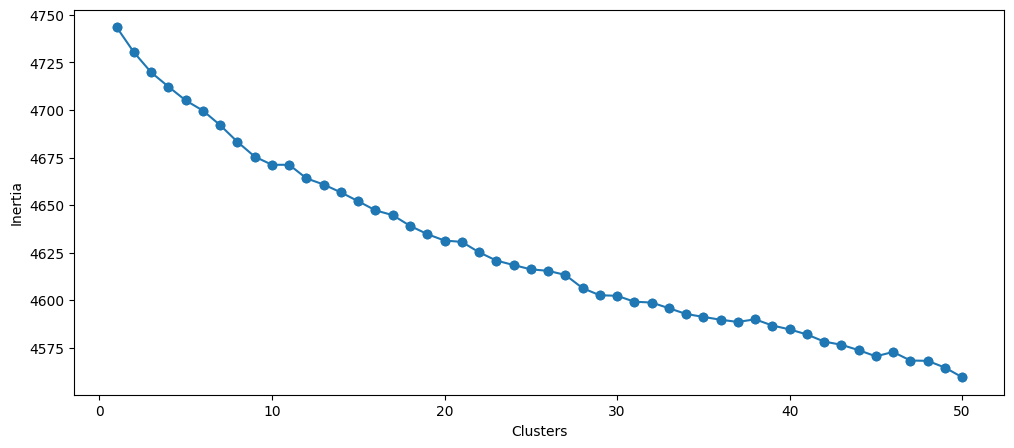

In [147]:
high_dimensional_kmeans = pd.DataFrame({'Clsuters' : range(1,51), 'Inertia' : k_cluster_inertia})

plt.figure(figsize=(12,5))
plt.scatter(x=high_dimensional_kmeans['Clsuters'], y=high_dimensional_kmeans['Inertia'])
plt.plot(high_dimensional_kmeans['Clsuters'], high_dimensional_kmeans['Inertia'], marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show


In [148]:
# Calculating silhouette score
silhouette_score_high_dimensionality = silhouette_score(tfidf_matrix, KMeans(n_clusters=5, random_state=42).fit_predict(tfidf_matrix))

# Create a new row for K Means with high dimensionality
kmeans_high_dimensionality_row = pd.DataFrame({'Model' : ['KMeans High Dimensionality'], 'Silhouette Score' : [silhouette_score_high_dimensionality]})

# Add row to dataframe
silhouette_dataframe = pd.concat([silhouette_dataframe, kmeans_high_dimensionality_row], ignore_index=True)
silhouette_dataframe.head()

<ipython-input-148-48cfa7ef2567>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  silhouette_dataframe = pd.concat([silhouette_dataframe, kmeans_high_dimensionality_row], ignore_index=True)


,Model,Silhouette Score
0,KMeans High Dimensionality,0.002979


---
# Principal Component Analysis

In [149]:
# Step 1: Fit PCA to find the optimal number of components
pca = PCA(n_components=2)  # Retain 2 components
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

In [150]:
# Step 2: Check how many components were selected
print(f"Number of components selected: {tfidf_pca.shape}")

Number of components selected: (4799, 2)


In [151]:
dump(tfidf_pca, 'tfidf_pca_2')

['tfidf_pca_2']

In [152]:
# # Intialize a list for inertia
k_cluster_inertia_low_dimensionality = []

# Loop through 10 clusters
for i in range(1,16):
    kmeans_range     = KMeans(n_clusters=i, random_state=42)
    kmeans_range.fit(tfidf_pca)
    k_cluster_inertia_low_dimensionality.append(kmeans_range.inertia_)

In [153]:
# Store Interia values using joblib to compare later with lower dimension data
dump(k_cluster_inertia_low_dimensionality, 'K-cluster-ineria-low-dimensionality')

['K-cluster-ineria-low-dimensionality']

<function matplotlib.pyplot.show(close=None, block=None)>

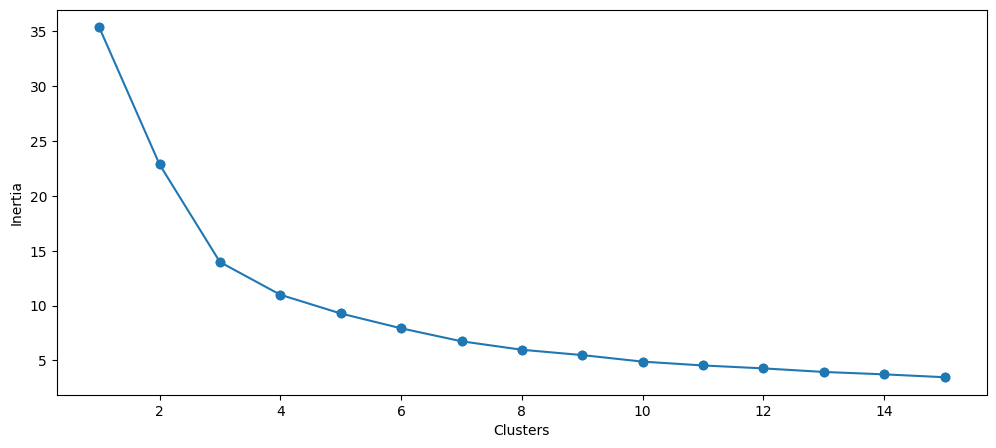

In [154]:
low_dimensional_kmeans = pd.DataFrame({'Clsuters' : range(1,16), 'Inertia' : k_cluster_inertia_low_dimensionality})

plt.figure(figsize=(12,5))
plt.scatter(x=low_dimensional_kmeans['Clsuters'], y=low_dimensional_kmeans['Inertia'])
plt.plot(low_dimensional_kmeans['Clsuters'], low_dimensional_kmeans['Inertia'], marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show


In [176]:
# Calculating silhouette score
kmeans_low_dimensionality = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_low_dimensionality.fit_predict(tfidf_pca)

silhouette_score_low_dimensionality = silhouette_score(tfidf_pca, kmeans_labels)

new_row = pd.DataFrame({'Model' : ['KMeans Low Dimensionality'], 'Silhouette Score' : [silhouette_score_low_dimensionality]})
silhouette_dataframe = pd.concat([silhouette_dataframe, new_row], ignore_index=True)
silhouette_dataframe.head()

,Model,Silhouette Score
0,KMeans High Dimensionality,0.002979
1,KMeans Low Dimensionality,0.418324
2,GMM,0.320773
3,HC,0.287222
4,DBSCAN,0.623067


In [210]:
dump(kmeans_labels, 'kmeans_labels')

['kmeans_labels']

---
# Gaussian Mixture Models

In [156]:
gmm = GaussianMixture(n_components=10, random_state=42)
gmm_pca = gmm.fit(tfidf_pca)

In [157]:
dump(gmm_pca, 'gmm_pca')

['gmm_pca']

In [158]:
gmm_pca_labels = gmm_pca.predict(tfidf_pca)

In [159]:
dump(gmm_pca_labels, 'gmm_pca_labels')

['gmm_pca_labels']

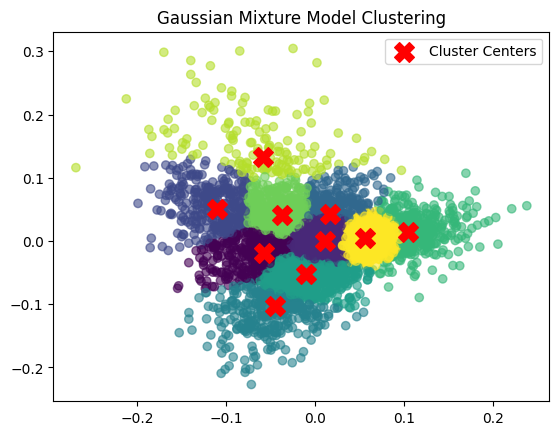

In [160]:
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=gmm_pca_labels, cmap='viridis', alpha=0.6)
plt.scatter(gmm_pca.means_[:, 0], gmm_pca.means_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title("Gaussian Mixture Model Clustering")
plt.legend()
plt.show()


In [161]:
probs = gmm_pca.predict_proba(tfidf_pca)

In [162]:
score = silhouette_score(tfidf_pca, gmm_pca_labels)

new_row = pd.DataFrame({'Model' : ['GMM'], 'Silhouette Score' : [score]})

silhouette_dataframe = pd.concat([silhouette_dataframe, new_row], ignore_index=True)
silhouette_dataframe.head(10)

,Model,Silhouette Score
0,KMeans High Dimensionality,0.002979
1,KMeans Low Dimensionality,0.418324
2,GMM,0.320773


---
# Heirarchical Clustering

In [163]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(tfidf_pca)

In [164]:
hc_score = silhouette_score(tfidf_pca, hc_labels)

new_row = pd.DataFrame({'Model' : ['HC'], 'Silhouette Score' : [hc_score]})

silhouette_dataframe = pd.concat([silhouette_dataframe, new_row], ignore_index=True)
silhouette_dataframe.head(10)

,Model,Silhouette Score
0,KMeans High Dimensionality,0.002979
1,KMeans Low Dimensionality,0.418324
2,GMM,0.320773
3,HC,0.287222


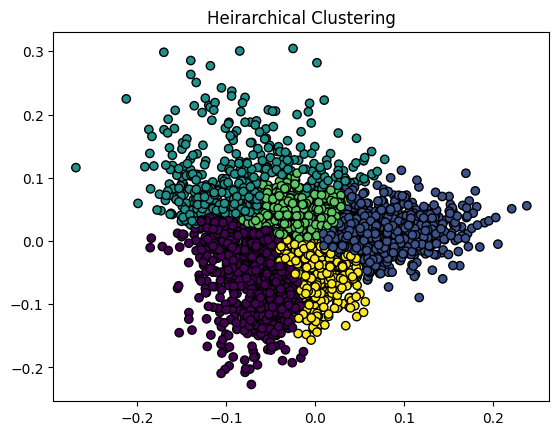

In [165]:
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=hc_labels, cmap='viridis', edgecolor='k')
plt.title("Heirarchical Clustering")
plt.show()

In [211]:
dump(hc_labels, 'hc_labels')

['hc_labels']

---
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN groups points into clusters based on density, defining dense regions as clusters and marking sparse regions as noise.

1. Key Parameters
  - $\epsilon$(eps)-> Defines the neighborhood radius around a point.
  - $\textit{MinPts}$ -> Minimum number of points required to form a dense region.
2. Core Concepts
  - Reachilibilty and Neighborhood <br>
  For a point $p$, define its $ϵ$-neighbourhood as:
  $$
  N_ϵ(P) = \{q \in D \mid d(p,q) \leq \varepsilon \}
  $$
  - Point Classification <br>
  Each point in the dataset is classified as:
    1. Core point: If $\mid N_ɛ(P) \mid \geq \textit{MinPts}$, meaning the point has enough neighbors.
    2. Border Point: Lies within $ϵ$-distance of a core point but has fewer than $\textit{MinPts} neighbors$
    3. Noise (Outlier) Point: Neither a core nor a border point.
3. Density Reachability.
  - A point $q$ is directly density-reachable from p if: <br>
  $q \in N_ϵ(P)$ and $\mid N_ϵ(P) \mid \geq \textit{MinPts}$ <br>
  Meaning a point $q$ is within the radius of the core, $p$ defined by radius $ϵ$ and the core encompases enough points to be considered a core.
  - A point $q$ is density-reachable from $p$ if there exist a chain of core points $P1, P2, ..., Pn$ <br>
  Meaning that a point $q$ is within a chain of clusters linked via making more cores that connect more points this is done to create dense areas that aren't sperical in nature essentially uncovering unique points and identfying outliers.
4. Density Connectivity.
- Two points $p$ and $q$ are density-connected if there exists a third point $o$ (a core point) such that both $p$ and $q$ are density-reachable from $o$.
- Ensures clusters remain globally connected, even if some points are not directly linked but are part of the same dense region.

    



In [166]:
dbscan = DBSCAN(eps=0.06, min_samples=3)  # Set parameters
dbscan_labels = dbscan.fit_predict(tfidf_pca)  # Fit model and get cluster labels

In [167]:
print(np.unique(dbscan_labels))

[-1  0]


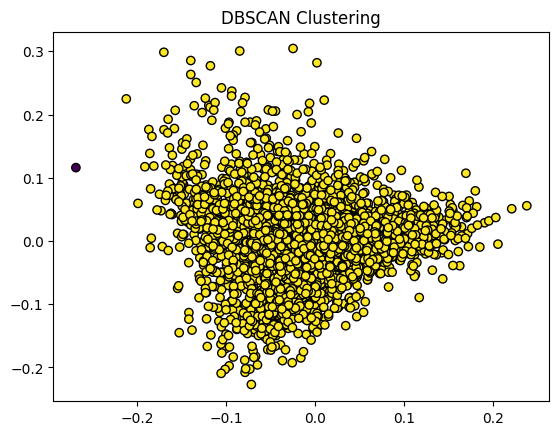

In [169]:
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k')
plt.title("DBSCAN Clustering")
plt.show()

In [191]:
dbscan_score = silhouette_score(tfidf_pca, dbscan_labels)

new_row = pd.DataFrame({'Model' : ['DBSCAN'], 'Silhouette Score' : [dbscan_score]})

silhouette_dataframe = pd.concat([silhouette_dataframe, new_row], ignore_index=True)
silhouette_dataframe.head(20)

,Model,Silhouette Score
0,KMeans High Dimensionality,0.002979
1,KMeans Low Dimensionality,0.418324
2,GMM,0.320773
3,HC,0.287222
4,DBSCAN,0.623067
5,KMeans Low Dimensionality,0.418324
6,DBSCAN,0.623067


In [212]:
dump(dbscan_labels, 'dbscan_labels')

['dbscan_labels']

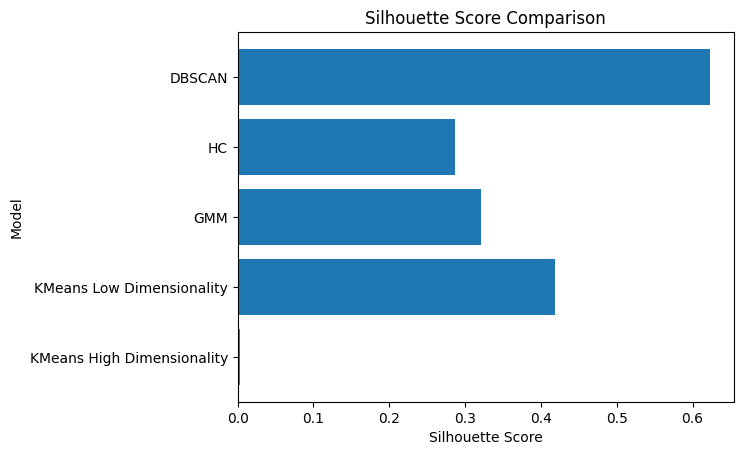

In [192]:
plt.barh(silhouette_dataframe['Model'], silhouette_dataframe['Silhouette Score'])
plt.xlabel('Silhouette Score')
plt.ylabel('Model')
plt.title('Silhouette Score Comparison')
plt.show()

---
# Movie Recommendations

In [206]:
# Select a movie index (you can change this)
movie_idx = 3012

# Get the cluster assignment for this movie
movie_cluster = kmeans_labels[movie_idx]
print(movie_cluster)

2


In [207]:
# Find all movies in the same cluster
similar_movies_idx = np.where(kmeans_labels == movie_cluster)[0]

In [208]:
# Exclude the selected movie itself
similar_movies_idx = similar_movies_idx[similar_movies_idx != movie_idx]

# Show top 5 recommendations
recommended_movies = tmdb_5000_movies_df.iloc[similar_movies_idx].head(5)

In [209]:
print("Selected Movie:", tmdb_5000_movies_df.iloc[movie_idx]['original_title'])  # Show selected movie
print("\nRecommended Movies:")
print(recommended_movies[['original_title', 'overview']])  # Show recommended movies

Selected Movie: pete's dragon

Recommended Movies:
                             original_title  \
0                                    avatar   
1  pirates of the caribbean: at world's end   
4                               john carter   
5                              spider-man 3   
7                   avengers: age of ultron   

                                            overview  
0  nd century paraplegic marine dispatched moon p...  
1  captain barbossa long believed dead come back ...  
4  john carter warweary former military captain w...  
5  seemingly invincible spiderman goes allnew cro...  
7  tony stark tries jumpstart dormant peacekeepin...  


In [201]:
def recommend_movies_by_title(movie_title, df, labels):
    # Ensure titles are in lowercase for case-insensitive matching
    df['original_title'] = df['original_title'].str.strip().str.lower()
    movie_title = movie_title.strip().lower()

    # Find all matching titles
    movie_idx = df[df['original_title'].str.contains(movie_title, regex=False)].index.tolist()

    if not movie_idx:
        return f"Movie '{movie_title}' not found in the dataset."

    movie_idx = movie_idx[0]  # Pick the first match if multiple

    # Check if movie_idx is within the valid range of labels
    if movie_idx >= len(labels):
        return f"Movie index {movie_idx} is out of bounds for labels array."

    # Find the cluster for this movie
    movie_cluster = labels[movie_idx]

    # Find all movies in the same cluster
    similar_movies_idx = np.where(labels == movie_cluster)[0]

    # Exclude the selected movie itself
    similar_movies_idx = similar_movies_idx[similar_movies_idx != movie_idx]

    # Get the recommended movies
    recommended_movies = df.iloc[similar_movies_idx].head(5)

    print(f"Selected Movie: {df.iloc[movie_idx]['original_title']}")
    print("\nRecommended Movies:")
    print(recommended_movies[['original_title', 'overview']])

# Example Usage
movie_name = "ratatouille"  # Change this to any movie title
recommend_movies_by_title(movie_name, tmdb_5000_movies_df, kmeans_labels)



Selected Movie: ratatouille

Recommended Movies:
                            original_title  \
6                                  tangled   
8   harry potter and the half-blood prince   
24                               king kong   
25                                 titanic   
34                     monsters university   

                                             overview  
6   kingdoms wantedand charmingbandit flynn rider ...  
8   harry begins sixth year hogwarts discovers old...  
24  new york overly ambitious movie producer coerc...  
25  years later yearold woman named rose dewitt bu...  
34  look relationship mike sulley days monsters un...  
